<a href="https://colab.research.google.com/github/patricktapajos/pos-ciencia-dados/blob/master/mod_05-vd/vd_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de Dados**

# 1. Apresentação



### Resumo
Este documento tem o objetivo de apresentar soluções visuais, através de gráficos, para alguns problemas encontrados ao explorarmos alguns conjuntos de dados (datasets). 

Os datasets escolhidos apresentam uma amostra de dados do seguinte domínio:
- Base de dados sobre vendas em lojas Wallmart



### Autores
Alunos de pós-graduação em Ciência de Dados da Universidade do Estado do Amazonas:
1.   [Patrick Tapajós Pinto](https://www.linkedin.com/in/patrick-tapajos-pinto/)
2.   [Wladimir Barroso Guedes de Araújo Neto](https://www.linkedin.com/in/wladneto/)


### Ferramentas Utilizadas
Serão utilizadas neste trabalho a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados.

# 2. Preparação de Ambiente



## Importando Bibliotecas e Pacotes para o trabalho

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Biblioteca para formação de valores monetários dos EUA (dólar)
import locale
locale.setlocale(locale.LC_ALL, '')

%matplotlib inline

In [ ]:
# Habilitar autocomplete
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


In [ ]:
# Informando ao sistema para utilizar o tema default do Seaborn
sns.set_theme()

# 3. Sobre o dataset

## 3.1 Base de dados sobre vendas em lojas Wallmart:

A base de dados "Walmart_Store_sales.csv" compreende uma coleção de informações sobre vendas em 45 unidades da loja Walmart, no período de 05/02/2010 à 01/11/2012.
Mais especificamente, a base é composta dos seguintes campos:

* Store - O número identificador da loja
* Date - A semana em que as vendas foram realizadas (em formato dd-mm-yyyy)
* Weekly_Sales - O valor total das vendas, por semana, da loja
* Holiday_Flag - Um verificador binário, utilizado para mostrar se a semana é considerada de "Feriado Especial" (1) ou se não há feriado na semana (0)
* Temperature - A temperatura no dia da venda
* Fuel_Price - O custo do combustível na região
* CPI – O Índice de preços no consumidor prevalente
* Unemployment - A taxa de desemprego prevalente

Link para download dos dados: https://github.com/patricktapajos/aedps-datasets/blob/master/Walmart_Store_sales.csv?raw=true

# 4. Preparação dos Dados

## 4.1 Walmart_Store_sales 

In [ ]:
df_walmart = pd.read_csv("https://github.com/patricktapajos/aedps-datasets/blob/master/Walmart_Store_sales.csv?raw=true")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Para facilitar o entendimento no decorrer do trabalho, vamos fazer algumas mudanças em nossa base.
Primeiramente, vamos mudar os nomes das variáveis.

In [ ]:
var_nomes = ['loja_id', 'data', 'vendas_semanais', 'feriado_id', 'temperatura', 'preco_combustivel', 'ipc', 'desemprego']
df_walmart.columns = var_nomes
df_walmart.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Uma outra alteração interessante a se fazer é transformar os valores da coluna data, que estão em formato de string, para o formato datetime.

In [ ]:
df_walmart['data'] = pd.to_datetime(df_walmart['data'], format='%d-%m-%Y')
df_walmart.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


Com as colunas apresentando nomes de melhor entendimento, vamos agora verificar os detalhes de nossa base:

In [ ]:
df_walmart.describe()

,loja_id,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
print(df_walmart.dtypes)
df_walmart.shape

loja_id                       int64
data                 datetime64[ns]
vendas_semanais             float64
feriado_id                    int64
temperatura                 float64
preco_combustivel           float64
ipc                         float64
desemprego                  float64
dtype: object


(6435, 8)

Outro ponto importante é verificar se nossa base possui algum dado inválido, que possa alterar nossos resultados:

In [ ]:
#verificando a existencia de nan
nan_val = 0
for coluna in df_walmart.columns:
  nan_val = df_walmart[f'{coluna}'].isnull().sum()
print(f'Valores nulos: {nan_val}')

Valores nulos: 0


Outras transformações e datasets derivados deste serão construídos conforme a necessidade ao longo do documento.

#5. Visualização dos Dados

Para que o processo de Visualização de Dados agregue significado e valor para uma apresentação, faz-se necessário que a mesma seja criada de modo a responder uma pergunta específica, resolver um problema específico. Tal problema está associado às necessidades do "cliente" a que estejamos atendendo.
De modo a facilitar esse casamento entre o problema e a apresentação que deve ser feita, o Dr. Andrew V. Abela, criador do método Extreme Presentation, propos um infográfico com o objetivo de facilitar a escolha do tipo de gráfico  a ser usada para uma classe de problema de Visualização de Dados. Este infográfico pode ser visualizado abaixo:

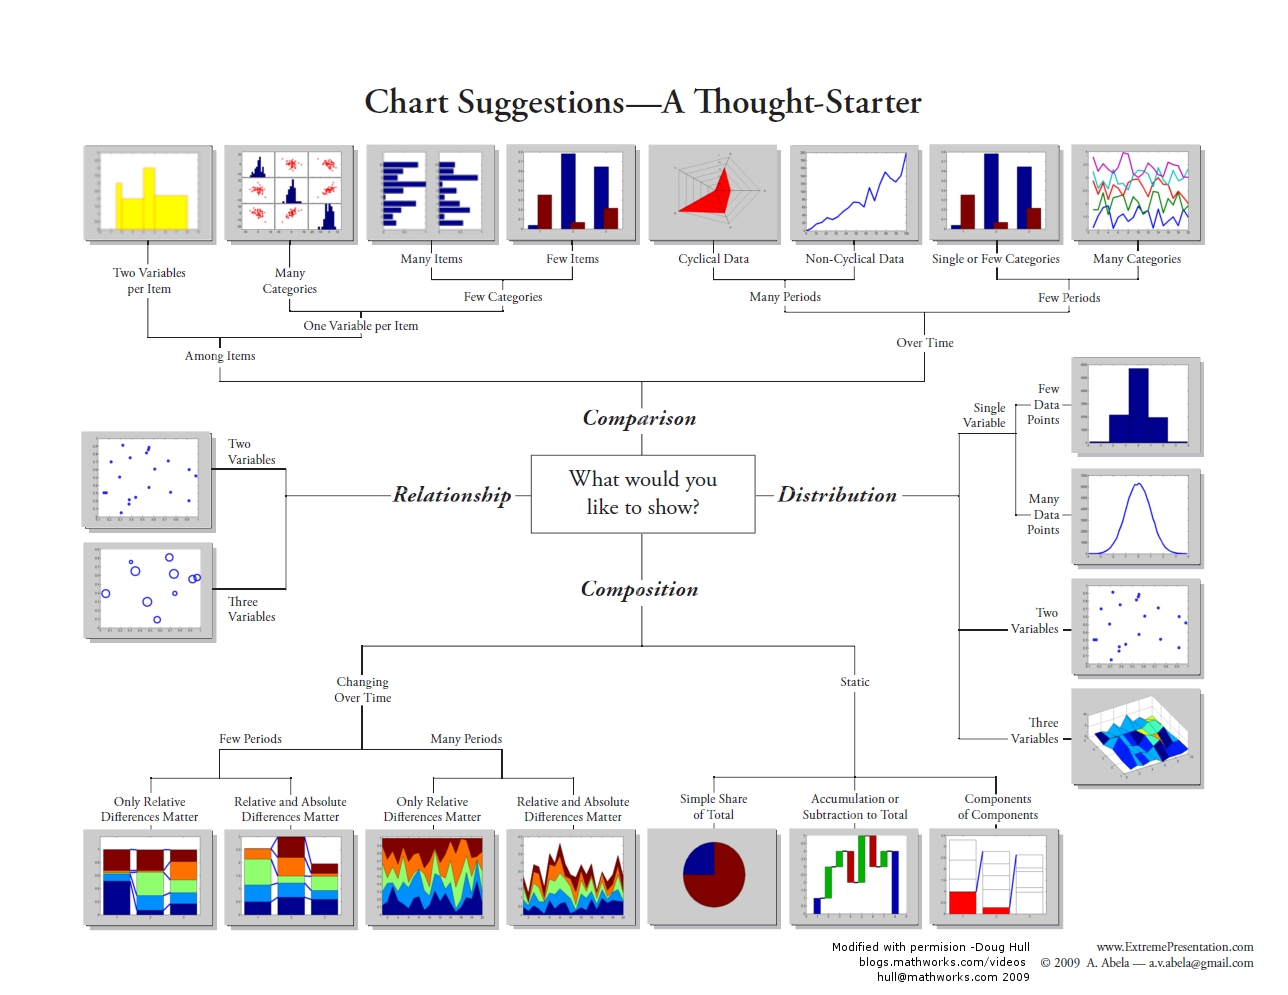

Dependendo do que desejamos explorar, existem quatro métodos básicos a serem utilizados: Comparação, Composição, Relacionamento e Distribuição. Estes métodos serão explorados com mais detalhes abaixo.

## 5.1 Comparação

O método de comparação talvez seja o mais conhecido e utilizado. Sua utilização é desejável quando precisamos avaliar e comparar conjuntos de dados distintos, de modo a entender características dos mesmos ou visualizar tendências. Ele pode ser aplicado para comparação entre itens ou através do tempo.

### 5.1.1 Entre itens

A comparação entre itens pode levar em consideração uma variável por item ou duas variáveis por item.

In [ ]:
df_walmart.columns

Index(['loja_id', 'data', 'vendas_semanais', 'feriado_id', 'temperatura',
       'preco_combustivel', 'ipc', 'desemprego'],
      dtype='object')

#### 5.1.1.1 Uma variável por item

##### 5.1.1.1.1 Muitas categorias

Quando desejamos visualizar comparações entre itens, que possuem apenas uma variável por item entre muitas categorias, frequentemente utilizamos o **Tabelas com Gráficos**. Nosso cliente, por exemplo, pode indagar:
 
* **Qual o total e a média de vendas e suas tendências, levando em consideração a taxa de desemprego acima da média no ano de 2011?**


In [ ]:
df_walmart_v_c = df_walmart[(df_walmart.data.dt.strftime('%Y-%m') >= '2011-01') & \
                            (df_walmart.data.dt.strftime('%Y-%m') <= '2011-12') & \
                            (df_walmart.desemprego > df_walmart.desemprego.mean())]

df_walmart_v_c['data'] = df_walmart_v_c['data'].dt.strftime('%m-%Y')
df_walmart_v_c = df_walmart_v_c.groupby('data').agg({'vendas_semanais':[np.mean, np.sum]}).reset_index()
df_walmart_v_c.columns = ['data','valor_medio', 'valor_total']
df_walmart_v_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,data,valor_medio,valor_total
0,01-2011,8.566561e+05,82238982.74
1,02-2011,9.740733e+05,93511037.86
2,03-2011,9.423916e+05,90469597.38
3,04-2011,9.090195e+05,90901947.37
4,05-2011,9.076786e+05,72614285.92
5,06-2011,9.405034e+05,75240270.69
6,07-2011,9.098511e+05,90985113.78
7,08-2011,9.377509e+05,75020071.58
8,09-2011,8.692329e+05,86923286.66
9,10-2011,8.988251e+05,50334207.82


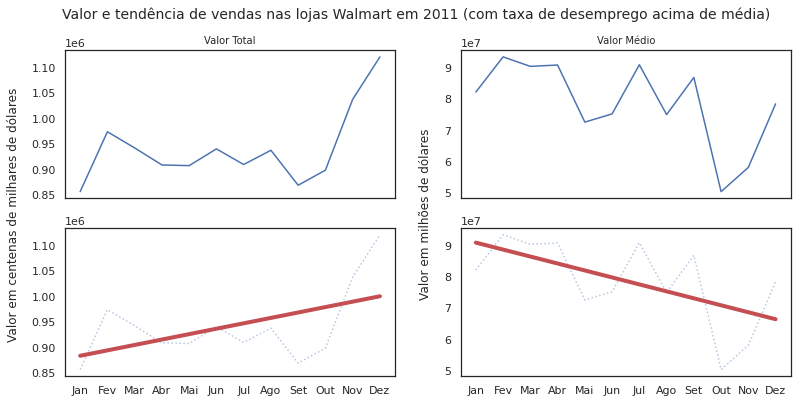

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(2,2,figsize=(13, 6), sharex=True)
fig.suptitle('Valor e tendência de vendas nas lojas Walmart em 2011 (com taxa de desemprego acima de média)', fontsize=14)

size = df_walmart_v_c.shape[0]
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
x, y = range(0, size), df_walmart_v_c['valor_medio']
z = np.polyfit(x, df_walmart_v_c['valor_medio'], 1)
p = np.poly1d(z)

ax[0,0].plot(meses, df_walmart_v_c['valor_medio'])
ax[0,0].set_title('Valor Total', fontsize=10)
ax[1,0].plot(meses, df_walmart_v_c['valor_medio'], alpha=.4, ls=':')
ax[1,0].plot(meses, p(x), c='r', linewidth=4)
ax[1,0].set_xticklabels(meses)
# ax[1,0].set_ylabel('Valor em centenas de milhares de dólares', fontdict={'size':10})
fig=ax[0,0].figure
fig.text(0.07,0.5, "Valor em centenas de milhares de dólares", ha="center", va="center", rotation=90)

x, y = range(0, size), df_walmart_v_c['valor_total']
z = np.polyfit(x, df_walmart_v_c['valor_total'], 1)
p = np.poly1d(z)

ax[0,1].plot(df_walmart_v_c['data'], df_walmart_v_c['valor_total'])
ax[0,1].set_title('Valor Médio',  fontsize=10)
ax[1,1].plot(meses, df_walmart_v_c['valor_total'], alpha=.4, label='valor médio de vendas', ls=':')
ax[1,1].plot(meses, p(x), c='r', linewidth=4)
ax[1,1].set_xticklabels(meses)
# ax[1,1].set_ylabel('Valor em milhões de dólares', fontdict={'size':10})
fig=ax[1,1].figure
fig.text(0.51,0.5, "Valor em milhões de dólares", ha="center", va="center", rotation=90)

plt.show()

##### 5.1.1.2.2 Poucas categorias

Porém, quando desejamos visualizar comparações entre itens, que possuem apenas uma variável por item entre poucas categorias, há ainda que se verificar se existem muitos ou poucos itens. Vejamos.


###### a) Muitos Itens

Quando desejamos visualizar comparações entre itens, que possuem apenas uma variável por item entre poucas categorias e muitos itens, frequentemente utilizamos o **Gráfico de Barras**, mais conhecido como Gráfico de Barras Horizontais. Nosso cliente, por exemplo, pode indagar:
 
* **Quais as lojas que mais venderam? Quero saber as 20 melhores.**


In [ ]:
df_walmart_top20 = df_walmart.groupby(['loja_id']).agg({'vendas_semanais':np.sum}) \
  .sort_values('vendas_semanais', ascending=False)[:20].reset_index()
df_walmart_top20.columns = ['loja', 'total']
df_walmart_top20.loja = df_walmart_top20.loja.apply(str)
df_walmart_top20

,loja,total
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


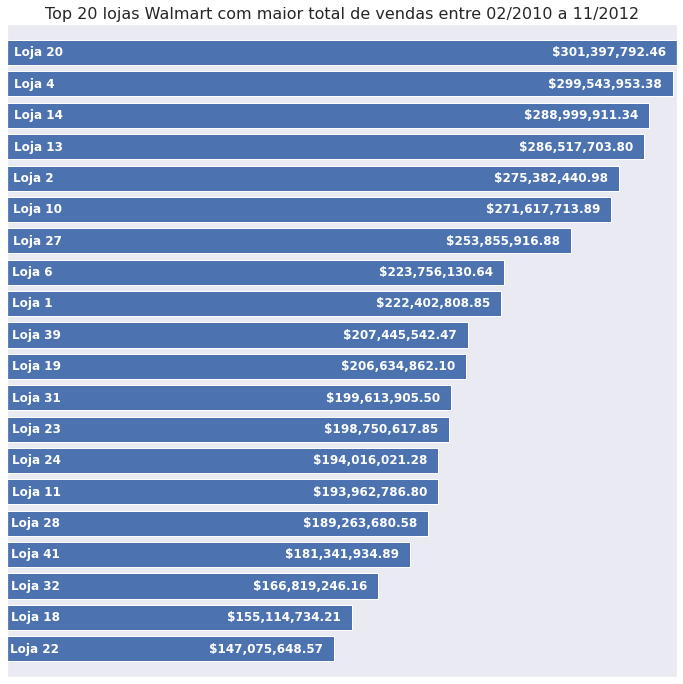

In [ ]:
sns.set_theme()

df_walmart_temp = df_walmart_top20.sort_values('total').reset_index()

lojas = df_walmart_temp.loja.map(lambda d: f'Loja {d}')
x = lojas
y = df_walmart_temp.total

fig, ax = plt.subplots(figsize=(12, 12))
for i, valor in enumerate(y):
  valor_ext = locale.currency(valor, grouping=True)
  ax.text(valor - math.pow(10, 7.75), i-0.1, valor_ext, fontdict={'color': 'w', 'weight': 'bold', 'size': 12})
  ax.text(valor * 0.01 , i-0.1, x[i], fontdict={'color': 'w', 'weight': 'bold', 'size': 12})

plt.title('Top 20 lojas Walmart com maior total de vendas entre 02/2010 a 11/2012', fontdict={'size': 16})
plt.barh(x, y)
plt.xticks([])
plt.yticks([])
plt.margins(0,0.025)
plt.show()

###### b) Poucos itens

Porém, quando desejamos visualizar comparações entre itens, que possuem apenas uma variável por item entre poucas categorias e poucos itens, frequentemente utilizamos o **Gráfico de Colunas**, também conhecido como Gráfico de Barras Verticais. Nosso cliente, por exemplo, pode indagar:
 
* **Quais as 5 lojas que mais venderam? Quero premiá-las.**


In [ ]:
df_walmart_top5 = df_walmart_top20[:5].reset_index(drop=True)
df_walmart_top5

,loja,total
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


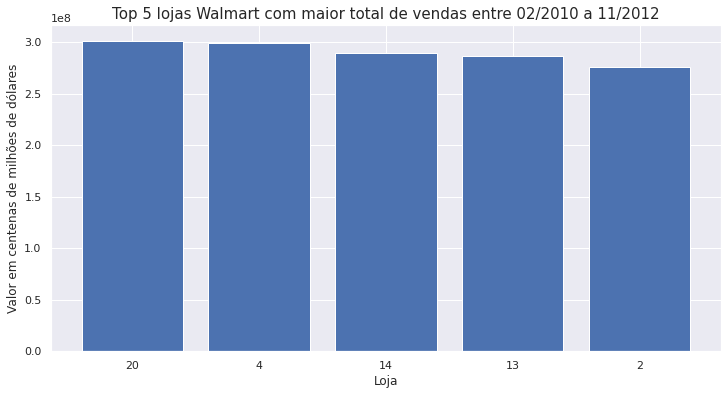

In [ ]:
sns.set_theme()
x = df_walmart_top5.loja
y = df_walmart_top5.total
  
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Top 5 lojas Walmart com maior total de vendas entre 02/2010 a 11/2012', fontdict={'size': 15})
plt.bar(x, y)
plt.xlabel('Loja')
plt.ylabel('Valor em centenas de milhões de dólares')
plt.show()

#### 5.1.1.2 Duas variáveis por item

### 5.1.2 Através do tempo

#### 5.1.2.1 Muitos períodos

a) Dados cíclicos

Quando desejamos verificar o comportamento de um item através do tempo (datas) e quando há muitos períodos e um ciclo de dados (Por exemplo: muitos períodos como meses e ciclo de um ano), podemos utilizar o **Gráfico de Área Circular**.  Para ilustrar essa situação utilizando nossa base de dados, perguntamos:

* **Ao longo de 2011, como foi o desempenho das vendas?**

In [ ]:
df_walmart_des_2011 = df_walmart[df_walmart.data.dt.strftime('%Y') == '2011']
df_walmart_des_2011['mes_ano_venda'] = df_walmart.data.dt.strftime('%m-%Y')
df_walmart_des_2011 = df_walmart_des_2011.groupby(['mes_ano_venda']).agg({'vendas_semanais':np.sum}).sort_values(by='mes_ano_venda').reset_index()
df_walmart_des_2011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mes_ano_venda,vendas_semanais
0,01-2011,1.637040e+08
1,02-2011,1.863313e+08
2,03-2011,1.793564e+08
3,04-2011,2.265265e+08
4,05-2011,1.816482e+08
5,06-2011,1.897734e+08
6,07-2011,2.299114e+08
7,08-2011,1.885993e+08
8,09-2011,2.208477e+08
9,10-2011,1.832613e+08


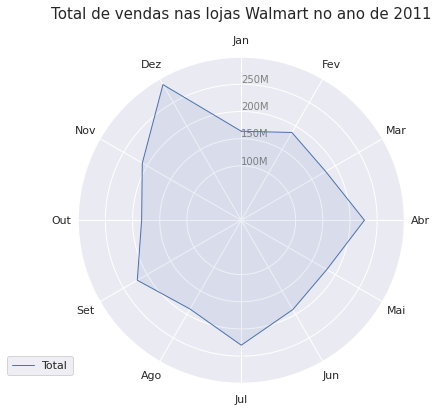

In [ ]:
categories = meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
N = len(categories)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(math.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([100000000, 150000000, 200000000, 250000000],["100M", "150M", "200M", "250M"], color="grey", size=10)
plt.ylim(0,300000000)

values=df_walmart_des_2011['vendas_semanais'].tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, label='Total')
ax.fill(angles, values, 'b', alpha=0.1)
ax.set_title('Total de vendas nas lojas Walmart no ano de 2011', y=1.1, fontdict={'size': 15})
plt.legend(bbox_to_anchor=(0 , 0.1))
plt.show()

b) Dados não-cíclicos

Agora, quando desejamos verificar o comportamento de um item através do tempo de modo a visualizar uma tendência nos dados ao	longo de intervalos de tempo, não necessariamente seguindo um ciclo - como apresentado anteriormente - podemos utilizar o **Gráfico de Linhas**. Assim, a linha da tendência é, frequentemente, desenhada cronologicamente.

In [ ]:
len(df_walmart['vendas_semanais'])

6435

Vamos verificar a tendência utilizando o período de semanas, como o dataset apresenta.

In [ ]:
df_walmart_semanas = df_walmart.groupby(["data"]).agg({"vendas_semanais":np.sum}).sort_index().reset_index()
df_walmart_semanas.columns = ['semana_venda', 'total'] 
df_walmart_semanas

,semana_venda,total
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [ ]:
df_walmart_stores_2011 = df_walmart[df_walmart.data.dt.strftime('%Y') == '2011']
df_walmart_stores_2011['mes_venda'] = df_walmart.data.dt.strftime('%m-%Y')
df_walmart_stores_2011 = df_walmart_stores_2011.groupby(["mes_venda"])["vendas_semanais"].sum().sort_index().reset_index()
df_walmart_stores_2011.columns = ['mes_venda', 'total'] 
df_walmart_stores_2011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mes_venda,total
0,01-2011,1.637040e+08
1,02-2011,1.863313e+08
2,03-2011,1.793564e+08
3,04-2011,2.265265e+08
4,05-2011,1.816482e+08
5,06-2011,1.897734e+08
6,07-2011,2.299114e+08
7,08-2011,1.885993e+08
8,09-2011,2.208477e+08
9,10-2011,1.832613e+08


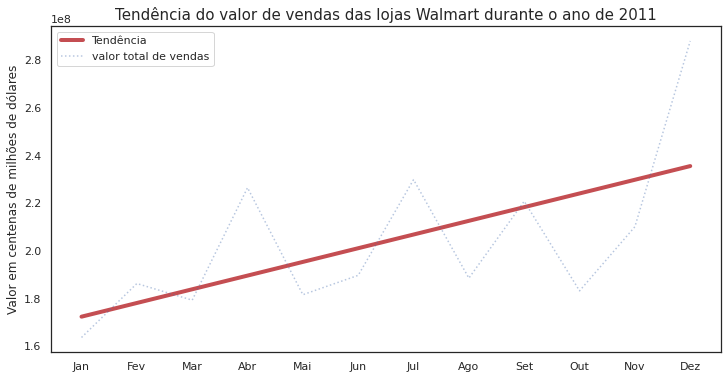

In [ ]:
sns.set_style("white")
size = df_walmart_stores_2011.shape[0]
plt.figure(figsize=(12, 6))

x, y = range(0, size), df_walmart_stores_2011['total']
z = np.polyfit(x, df_walmart_stores_2011['total'], 1)
p = np.poly1d(z)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.plot(meses, p(x), c='r', linewidth=4, label='Tendência')
plt.plot(meses, df_walmart_stores_2011['total'], alpha=.4, label='valor total de vendas', ls=':')

plt.title('Tendência do valor de vendas das lojas Walmart durante o ano de 2011', fontdict={'size': 15})
plt.ylabel('Valor em centenas de milhões de dólares')
plt.legend()
plt.show()

**E a tendência no periodo todo?** - pode indagar nosso cliente. Vamos lá.

In [ ]:
df_walmart_meses = df_walmart.copy()
df_walmart_meses['mes_venda'] = df_walmart.data.dt.strftime('%m-%Y')
df_walmart_meses['ano_venda'] = df_walmart.data.dt.strftime('%Y')
df_walmart_meses = df_walmart_meses.groupby(["ano_venda","mes_venda"])["vendas_semanais"].sum().sort_index().reset_index()
df_walmart_meses.columns = ['ano_venda','mes_venda', 'total'] 
df_walmart_meses

,ano_venda,mes_venda,total
0,2010,02-2010,1.903330e+08
1,2010,03-2010,1.819198e+08
2,2010,04-2010,2.314124e+08
3,2010,05-2010,1.867109e+08
4,2010,06-2010,1.922462e+08
5,2010,07-2010,2.325801e+08
6,2010,08-2010,1.876401e+08
7,2010,09-2010,1.772679e+08
8,2010,10-2010,2.171618e+08
9,2010,11-2010,2.028534e+08


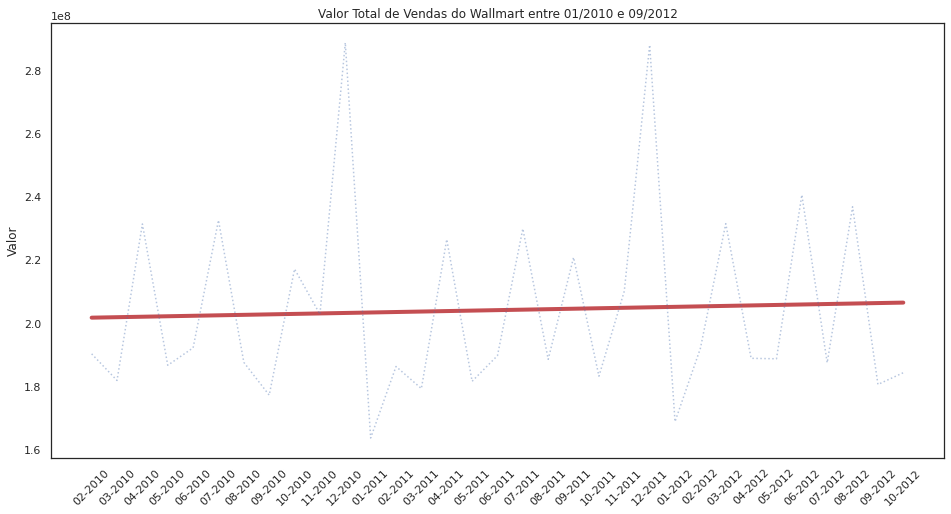

In [ ]:
sns.set_style("white")
size = df_walmart_meses.shape[0]
plt.figure(figsize=(16,8))
plt.title('Valor Total de Vendas do Wallmart entre 01/2010 e 09/2012')
plt.ylabel('Valor')

x, y = range(0, size), df_walmart_meses['total']
z = np.polyfit(x, df_walmart_meses['total'], 1)
p = np.poly1d(z)

plt.plot(df_walmart_meses['mes_venda'], p(x), c='r', linewidth=4, label='Tendência')
plt.plot(df_walmart_meses['mes_venda'], df_walmart_meses['total'], alpha=.4, label='valor total de vendas', ls=':')
plt.xticks(rotation=45)
plt.show()

Ou caso, simplesmente, queira apresentar as vendas no período todo, sem destaque para tendência, então...

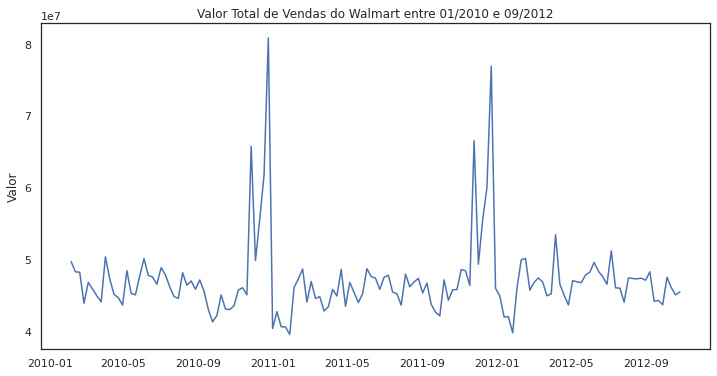

In [ ]:
df_walmart_time=df_walmart.groupby(["data"])["vendas_semanais"].sum()
# ts.astype('float')
plt.figure(figsize=(12,6))
plt.title('Valor Total de Vendas do Walmart entre 01/2010 e 09/2012')
plt.ylabel('Valor')
plt.plot(df_walmart_time);

#### 5.1.2.2 Poucos períodos

##### a) Uma ou poucas categorias

Quando desejamos verificar o comportamento de um item através do tempo (datas) e quando há poucos períodos e poucas categorias, podemos utilizar o **Gráfico de Colunas**. Para ilustrar essa situação utilizando nossa base de dados, perguntamos:

* **Qual o total de venda durante o período das TOP 5 melhores lojas?**

In [ ]:
df_walmart_top5 = df_walmart.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).sort_values('vendas_semanais', ascending=False)[:5].reset_index()
# df_walmart_top20 = df_walmart.groupby(['loja_id']).agg({'vendas_semanais':np.sum}) \
#   .sort_values('vendas_semanais', ascending=False)[:20].reset_index()
df_walmart_top5

,loja_id,vendas_semanais
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


In [ ]:
df_walmart_ano_loja = df_walmart.copy(deep=True)
df_walmart_ano_loja['ano_venda'] = df_walmart_ano_loja.data.dt.strftime('%Y')
df_walmart_ano_loja = df_walmart_ano_loja.groupby(['ano_venda', 'loja_id']).agg({'vendas_semanais': np.sum}).sort_values('ano_venda').reset_index()

In [ ]:
df_walmart_data_vendas_top5 = df_walmart_ano_loja[df_walmart_ano_loja.loja_id.isin(df_walmart_top5.loja_id.values)] \
      .groupby(['ano_venda','loja_id']).agg({'vendas_semanais':np.sum}).sort_values('ano_venda').reset_index()
df_walmart_data_vendas_top5

,ano_venda,loja_id,vendas_semanais
0,2010,2,9.527786e+07
1,2010,4,9.568047e+07
2,2010,13,9.527274e+07
3,2010,14,1.054622e+08
4,2010,20,1.017331e+08
5,2011,2,9.860788e+07
6,2011,4,1.110923e+08
7,2011,13,1.045375e+08
8,2011,14,1.060963e+08
9,2011,20,1.098370e+08


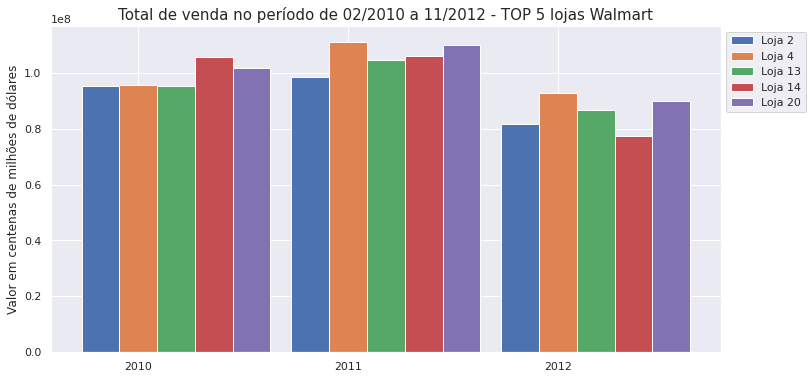

In [ ]:
sns.set_theme()

plt.figure(figsize=(12,6))
barWidth = 0.18
x_pos = bar = []
anos = df_walmart_data_vendas_top5.ano_venda.unique()
lojas = df_walmart_data_vendas_top5.loja_id.unique()

for i, loja in enumerate(lojas):
  bar = df_walmart_data_vendas_top5[df_walmart_data_vendas_top5.loja_id==loja]['vendas_semanais'].values
  if i==0:
    x_pos = np.arange(len(bar))
  else:
    x_pos = [x + barWidth for x in x_pos]

  plt.bar(x_pos, bar, width=barWidth, label=f'Loja {loja}')

plt.title('Total de venda no período de 02/2010 a 11/2012 - TOP 5 lojas Walmart', fontdict={'size': 15})
# plt.margins(0,0)
plt.xticks([r + barWidth for r in range(len(anos))], anos)
plt.ylabel('Valor em centenas de milhões de dólares')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

##### b) Muitas categorias

Porém, quando desejamos verificar o comportamento de um item através do tempo (datas) e quando há poucos períodos, mas muitas categorias, podemos utilizar o **Gráfico de Linhas**. Para ilustrar essa situação utilizando nossa base de dados, perguntamos:

* **Qual o total de venda durante o período das TOP 10 melhores lojas?**

In [ ]:
df_walmart_ano_loja

,ano_venda,loja_id,vendas_semanais
0,2010,1,73278832.00
1,2010,26,48390697.78
2,2010,27,90013176.57
3,2010,28,64778764.93
4,2010,29,26946827.49
...,...,...,...
130,2012,18,44918576.80
131,2012,19,59212433.28
132,2012,20,89827709.38
133,2012,11,58184065.68


In [ ]:
df_walmart_top10 = df_walmart.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).sort_values('vendas_semanais', ascending=False)[:10].reset_index()
df_walmart_top10

,loja_id,vendas_semanais
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [ ]:
df_walmart_top10_sf = df_walmart_ano_loja[df_walmart_ano_loja.loja_id.isin(df_walmart_top10.loja_id.values)]
df_walmart_top10_sf = df_walmart_top10_sf.groupby(['ano_venda','loja_id']).agg({'vendas_semanais':np.sum}).sort_values(['ano_venda','vendas_semanais']).reset_index()
df_walmart_top10_sf.shape

(30, 3)

In [ ]:
data = {}

for loja in df_walmart_top10_sf.loja_id.unique():
  data[loja] = df_walmart_top10_sf[df_walmart_top10_sf.loja_id == loja]['vendas_semanais'].values

df_ano_loja_top_10 = pd.DataFrame(data, index=df_walmart_top10_sf['ano_venda'].unique())
df_ano_loja_top_10

,39,1,6,27,10,13,2,4,20,14
2010,65782276.32,73278832.00,76912320.69,90013176.57,94472202.21,9.527274e+07,95277864.19,9.568047e+07,1.017331e+08,1.054622e+08
2011,75777603.30,80921918.83,80528762.95,91922684.19,98916894.74,1.045375e+08,98607881.42,1.110923e+08,1.098370e+08,1.060963e+08
2012,65885662.85,68202058.02,66315047.00,71920056.12,78228616.94,8.670746e+07,81496695.37,9.277119e+07,8.982771e+07,7.744140e+07


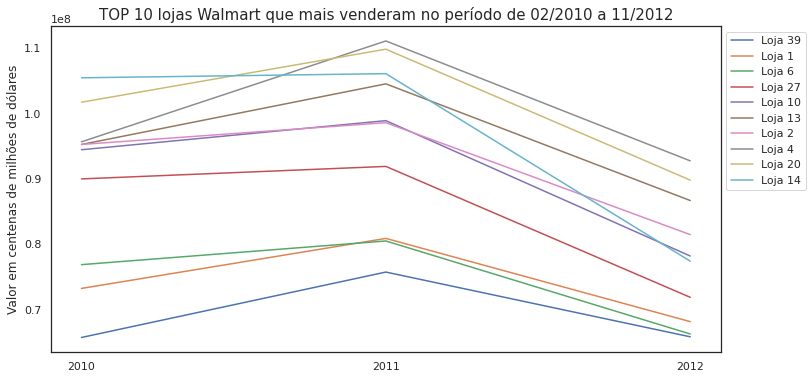

In [ ]:
sns.set_style("white")
plt.figure(figsize=(12, 6))
for d in data:
  plt.plot(df_ano_loja_top_10.index.values, df_ano_loja_top_10[d], label=f'Loja {d}')
plt.title('TOP 10 lojas Walmart que mais venderam no período de 02/2010 a 11/2012', fontdict={'size':15})
plt.ylabel('Valor em centenas de milhões de dólares')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## 5.2 Composição

A idéia por trás do que chamamos de Composição, em Visualização de Dados, é mostrar como partes individuais de um determinado conjunto de informações combinam-se. Desta forma, podemos mostrar, por exemplo, de que forma esta combinação se divide e mostrar a importância de cada parte.

### 5.2.1 Composições com alterações no decorrer do tempo

#### 5.2.1.1 Poucos períodos

Supondo que nosso cliente deseje ter uma visão sobre uma determinada variável, para entidades diferentes, em um intervalo de tempo pequeno, uma forma interessante de exibir essa informação é através de um gráfico de colunas empilhadas. Com esse gráfico, podemos mostrar, por exemplo, o total de vendas em um mês dividido por loja, estando este informação presente em apenas uma coluna.

Considerando isto e nossa base, perguntamos: 

* **No primeiro semestre de 2011, como dividiram-se as 5 melhores lojas em valor de vendas?**

##### a) Apenas diferenças relativas importam

In [ ]:
df_walmart_copy = df_walmart.copy(deep=True)
df_walmart_copy.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df_walmart_copy['ano'] = [data.strftime('%Y') for data in df_walmart_copy['data']]
df_walmart_copy['mes'] = [data.strftime('%m') for data in df_walmart_copy['data']]
df_walmart_copy.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego,ano,mes
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03


In [ ]:
# Selecionando apenas as vendas feitas em 2011
df_walmart_2011 = df_walmart_copy.loc[df_walmart_copy['ano'] == '2011']
df_walmart_2011.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego,ano,mes
48,1,2011-01-07,1444732.28,0,48.27,2.976,211.404742,7.742,2011,01
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,2011,01
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,2011,01
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,2011,01
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742,2011,02


In [ ]:
# Selecionando apenas os campos necessários
df_walmart_2011 = df_walmart_2011[['loja_id','mes','vendas_semanais']]
df_walmart_2011.head()

,loja_id,mes,vendas_semanais
48,1,01,1444732.28
49,1,01,1391013.96
50,1,01,1327405.42
51,1,01,1316899.31
52,1,02,1606629.58


In [ ]:
# Agregando as vendas por loja
df_vendas_loja_ano = df_walmart_2011.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_loja_ano.rename(columns={'vendas_semanais':'vendas_anuais'}, inplace=True)
df_vendas_loja_ano.head()

,loja_id,vendas_anuais
0,1,8.092192e+07
1,2,9.860788e+07
2,3,2.081688e+07
3,4,1.110923e+08
4,5,1.647082e+07


In [ ]:
# Selecionando as 5 melhores lojas em vendas em 2011
df_vendas_loja_ano_top5 = df_vendas_loja_ano.sort_values(by='vendas_anuais', ascending=False)[:5]
df_vendas_loja_ano_top5.head()

,loja_id,vendas_anuais
3,4,1.110923e+08
19,20,1.098370e+08
13,14,1.060963e+08
12,13,1.045375e+08
9,10,9.891689e+07


In [ ]:
# Selecionando as vendas pelo top 5 de lojas
df_walmart_2011_top5 = df_walmart_2011[df_walmart_2011['loja_id'].isin(df_vendas_loja_ano_top5['loja_id'])]
df_walmart_2011_top5

,loja_id,mes,vendas_semanais
477,4,01,1862476.27
478,4,01,1865502.46
479,4,01,1886393.94
480,4,01,1814240.85
481,4,02,2119086.04
...,...,...,...
2812,20,12,2298776.83
2813,20,12,2546123.78
2814,20,12,2762816.65
2815,20,12,3555371.03


In [ ]:
# Agregando as vendas por loja e mês
df_vendas_loja_mes = df_walmart_2011_top5.groupby(['loja_id', 'mes']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_loja_mes.rename(columns={'vendas_semanais':'vendas_mensais'},inplace=True)
df_vendas_loja_mes.head()

,loja_id,mes,vendas_mensais
0,4,01,7428613.52
1,4,02,8701523.58
2,4,03,8203913.86
3,4,04,10034555.89
4,4,05,8068206.56


In [ ]:
# Agregando as vendas por mês
df_vendas_mes_ano = df_walmart_2011_top5.groupby(['mes']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_mes_ano.rename(columns={'vendas_semanais':'vendas_anuais'},inplace=True)
df_vendas_mes_ano

,mes,vendas_anuais
0,01,35269190.98
1,02,41118742.50
2,03,38878301.99
3,04,49392906.81
4,05,38925006.29
5,06,40077192.02
6,07,48704662.36
7,08,40476547.78
8,09,47539639.75
9,10,39881832.19


In [ ]:
df_vendas_loja_mes_piv = df_vendas_loja_mes.pivot_table(index='mes', columns=['loja_id'], values='vendas_mensais')
df_vendas_loja_mes_piv

loja_id,4,10,13,14,20
mes,,,,,
01,7428613.52,6818438.72,6830701.19,6920749.25,7270688.30
02,8701523.58,8158385.48,7628040.02,7871037.45,8759755.97
03,8203913.86,7592005.50,7407382.47,7784262.93,7890737.23
04,10034555.89,9358698.61,9722597.18,10068949.32,10208105.81
05,8068206.56,7018273.82,7672497.44,8140592.27,8025436.20
06,8288884.07,7062021.88,8029007.42,8363952.33,8333326.32
07,10193027.80,8746330.47,9894423.48,9844705.90,10026174.71
08,8487108.44,7486946.36,8172158.70,8165139.12,8165195.16
09,10208029.69,8393679.31,9432867.60,9499817.19,10005245.96


In [ ]:
df_vendas_loja_mes_pct = df_vendas_loja_mes_piv.copy(deep=True)

for column in df_vendas_loja_mes_piv.columns:
  for row in range(0,len(df_vendas_loja_mes_piv[column])):
    df_vendas_loja_mes_pct[column][row] = 100 * (df_vendas_loja_mes_piv[column][row] / df_vendas_mes_ano['vendas_anuais'][row])
df_vendas_loja_mes_pct

loja_id,4,10,13,14,20
mes,,,,,
01,21.062614,19.332563,19.367332,19.622648,20.614843
02,21.161940,19.841038,18.551248,19.142213,21.303560
03,21.101523,19.527616,19.052742,20.022127,20.295992
04,20.315783,18.947455,19.684197,20.385416,20.667149
05,20.727566,18.030245,19.710973,20.913528,20.617688
06,20.682297,17.621050,20.033857,20.869607,20.793189
07,20.928238,17.957892,20.315146,20.213067,20.585657
08,20.967965,18.496998,20.189861,20.172519,20.172657
09,21.472669,17.656169,19.842110,19.982939,21.046112


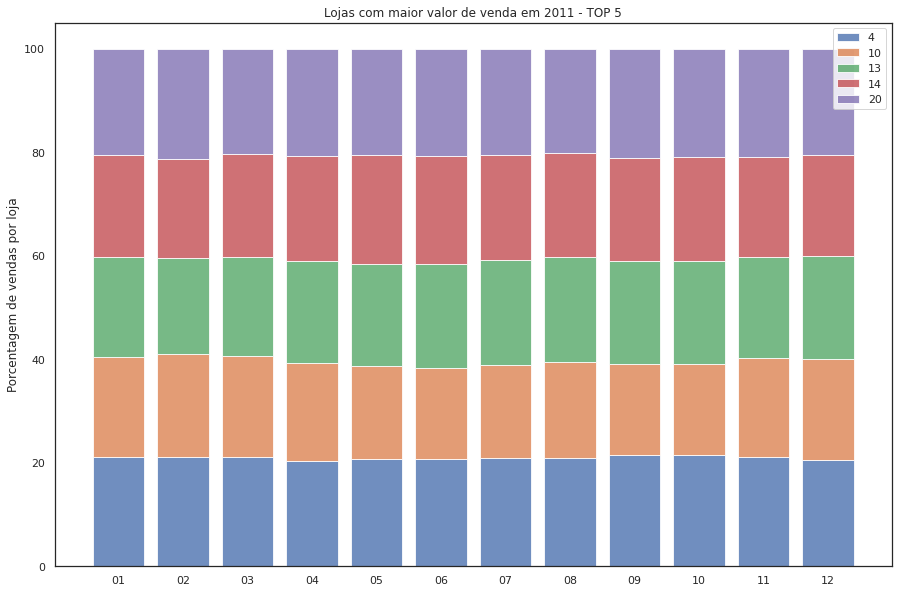

In [ ]:
df_temp = df_vendas_loja_mes_pct.copy(deep=True)

lojas = df_temp.columns
plt.figure(figsize=(15,10))
altura = 0

for loja in lojas:
    plt.bar(df_temp.index, df_temp[loja], label=loja, bottom=altura, alpha=.8)
    altura = altura + df_temp[loja].values
    
plt.ylabel('Porcentagem de vendas por loja')
plt.title('Lojas com maior valor de venda em 2011 - TOP 5')
plt.legend()
plt.show()

##### b) Diferenças relativas e absolutas importam

Entretanto, caso queiramos mostrar as diferenças relativas e absolutas entre estas mesmas lojas, nosso gráfico muda um pouco de forma:

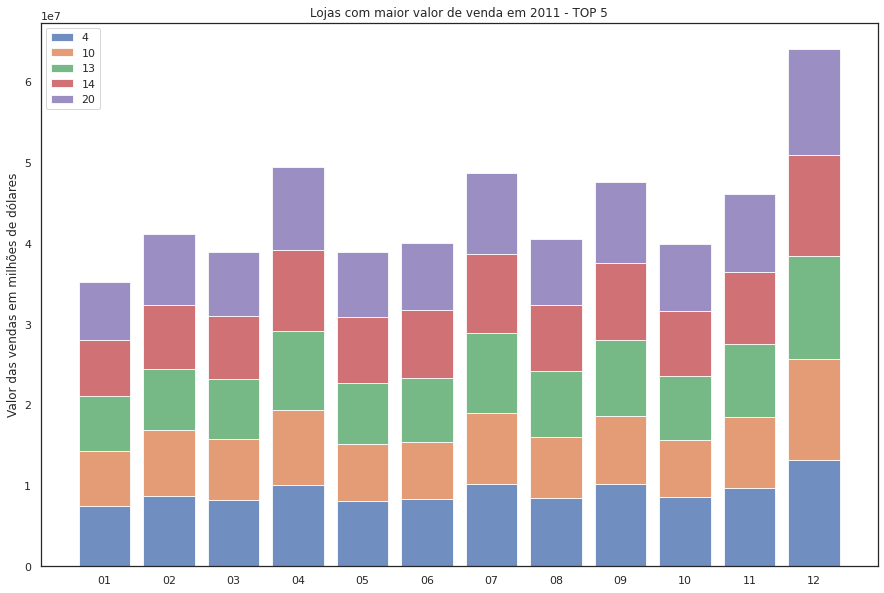

In [ ]:
df_temp = df_vendas_loja_mes_piv.copy(deep=True)

lojas = df_temp.columns
plt.figure(figsize=(15,10))
altura = 0

for loja in lojas:
    plt.bar(df_temp.index, df_temp[loja], label=loja, bottom=altura, alpha=.8)
    altura = altura + df_temp[loja].values
    
plt.ylabel('Valor das vendas em milhões de dólares')
plt.title('Lojas com maior valor de venda em 2011 - TOP 5')
plt.legend()
plt.show()

#### 5.2.1.2 Muitos períodos

##### a) Apenas diferenças relativas importam

In [ ]:
df_walmart_full = df_walmart_copy.copy(deep=True)
df_walmart_full['mes_ano'] = [data.strftime('%Y-%m') for data in df_walmart_copy['data']]
df_walmart_full

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego,ano,mes,mes_ano
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,2010-03
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,2012-09
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,2012-10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,2012-10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,2012-10


In [ ]:
df_walmart_full = df_walmart_full[['loja_id','vendas_semanais', 'mes_ano']]
df_walmart_full

,loja_id,vendas_semanais,mes_ano
0,1,1643690.90,2010-02
1,1,1641957.44,2010-02
2,1,1611968.17,2010-02
3,1,1409727.59,2010-02
4,1,1554806.68,2010-03
...,...,...,...
6430,45,713173.95,2012-09
6431,45,733455.07,2012-10
6432,45,734464.36,2012-10
6433,45,718125.53,2012-10


In [ ]:
# Agregando as vendas por loja
df_vendas_loja_ano = df_walmart_full.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_loja_ano.rename(columns={'vendas_semanais':'vendas_anuais'}, inplace=True)
df_vendas_loja_ano.head()

,loja_id,vendas_anuais
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [ ]:
# Selecionando as 5 melhores lojas em vendas em 2011
df_vendas_loja_ano_top5 = df_vendas_loja_ano.sort_values(by='vendas_anuais', ascending=False)[:5]
df_vendas_loja_ano_top5.head()

,loja_id,vendas_anuais
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [ ]:
# Selecionando as vendas pelo top 5 de lojas
df_walmart_full_top5 = df_walmart_full[df_walmart_full['loja_id'].isin(df_vendas_loja_ano_top5['loja_id'])]
df_walmart_full_top5

,loja_id,vendas_semanais,mes_ano
143,2,2136989.46,2010-02
144,2,2137809.50,2010-02
145,2,2124451.54,2010-02
146,2,1865097.27,2010-02
147,2,1991013.13,2010-03
...,...,...,...
2855,20,2008350.58,2012-09
2856,20,2246411.89,2012-10
2857,20,2162951.36,2012-10
2858,20,1999363.49,2012-10


In [ ]:
# Agregando as vendas por loja e mês
df_vendas_loja_mes = df_walmart_full_top5.groupby(['loja_id', 'mes_ano']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_loja_mes.rename(columns={'vendas_semanais':'vendas_mensais'},inplace=True)
df_vendas_loja_mes.head()

,loja_id,mes_ano,vendas_mensais
0,2,2010-02,8264347.77
1,2,2010-03,7677765.60
2,2,2010-04,9520276.09
3,2,2010-05,7777385.06
4,2,2010-06,8069642.74


In [ ]:
# Agregando as vendas por mês
df_vendas_mes_ano = df_walmart_full_top5.groupby(['mes_ano']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_mes_ano.rename(columns={'vendas_semanais':'vendas_anuais'},inplace=True)
df_vendas_mes_ano

,mes_ano,vendas_anuais
0,2010-02,41547751.28
1,2010-03,39232649.35
2,2010-04,49638656.98
3,2010-05,40007025.90
4,2010-06,41131448.24
5,2010-07,49039883.25
6,2010-08,39481563.64
7,2010-09,38036777.80
8,2010-10,47240283.46
9,2010-11,44207807.45


In [ ]:
df_vendas_loja_mes_piv = df_vendas_loja_mes.pivot_table(index='mes_ano', columns=['loja_id'], values='vendas_mensais')
df_vendas_loja_mes_piv

loja_id,2,4,13,14,20
mes_ano,,,,,
2010-02,8264347.77,8299040.36,7786278.95,8627837.12,8570247.08
2010-03,7677765.60,7525350.19,7542558.24,8510195.38,7976779.94
2010-04,9520276.09,9269170.71,9555618.05,11096700.43,10196891.70
2010-05,7777385.06,7637509.72,7626768.36,8835226.91,8130135.85
2010-06,8069642.74,7550298.11,8034361.74,9107997.01,8369148.64
2010-07,9316686.92,9237037.48,9546628.09,10800283.49,10139247.27
2010-08,7715686.75,7760274.34,7752389.90,8350268.69,7902943.96
2010-09,7262197.74,7512322.68,7179931.35,8207762.40,7874563.63
2010-10,9012420.11,9522604.02,9173784.27,9800918.92,9730556.14


In [ ]:
df_vendas_loja_mes_pct = df_vendas_loja_mes_piv.copy(deep=True)

for column in df_vendas_loja_mes_piv.columns:
  for row in range(0,len(df_vendas_loja_mes_piv[column])):
    df_vendas_loja_mes_pct[column][row] = 100 * (df_vendas_loja_mes_piv[column][row] / df_vendas_mes_ano['vendas_anuais'][row])
df_vendas_loja_mes_pct

loja_id,2,4,13,14,20
mes_ano,,,,,
2010-02,19.891204,19.974704,18.740554,20.766075,20.627463
2010-03,19.569837,19.181346,19.225207,21.691615,20.331994
2010-04,19.179157,18.673291,19.250356,22.354957,20.542239
2010-05,19.440048,19.090421,19.063572,22.084188,20.321770
2010-06,19.619155,18.356509,19.533379,22.143633,20.347323
2010-07,18.998183,18.835766,19.467069,22.023469,20.675513
2010-08,19.542506,19.655438,19.635468,21.149792,20.016796
2010-09,19.092568,19.750155,18.876287,21.578490,20.702499
2010-10,19.077828,20.157805,19.419410,20.746952,20.598005


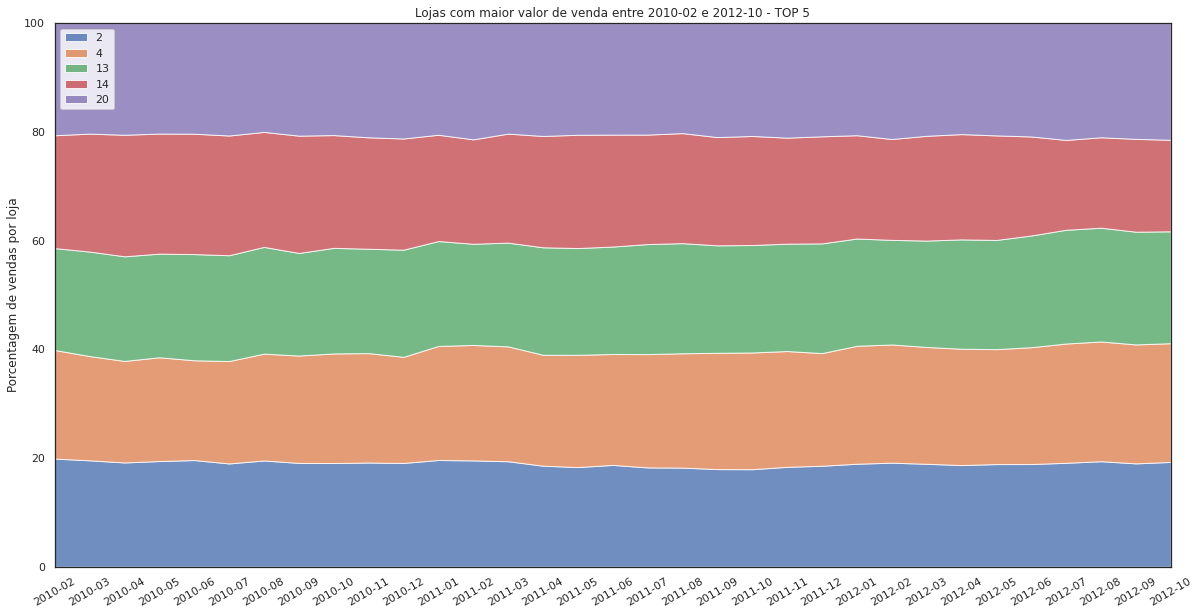

In [ ]:
df_temp = df_vendas_loja_mes_pct
lojas = df_temp.columns
plt.figure(figsize=(20,10))

x, y = df_vendas_loja_mes_pct[2].index, []

for loja in lojas:
    y.append(df_temp[loja].values)

plt.stackplot(x,y, labels=lojas, alpha=.8)
plt.xticks(rotation=30)
plt.ylabel('Porcentagem de vendas por loja')
plt.title('Lojas com maior valor de venda entre 2010-02 e 2012-10 - TOP 5')
plt.legend(loc='upper left')
plt.margins(0,0)
plt.show()

##### b) Diferenças relativas e absolutas importam

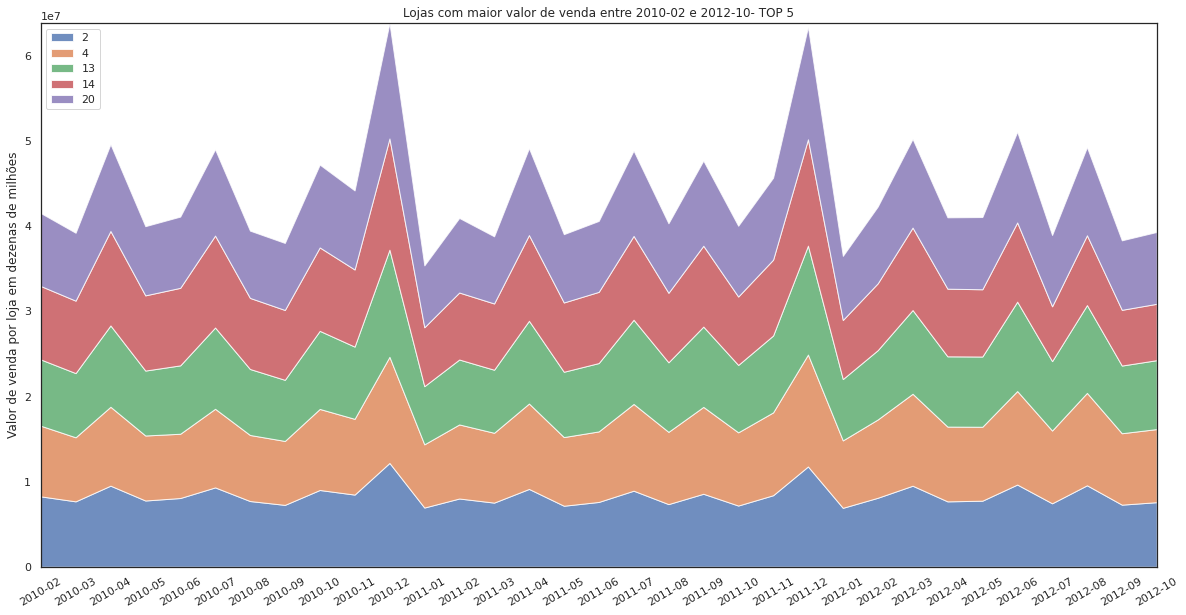

In [ ]:
df_temp = df_vendas_loja_mes_piv
lojas = df_temp.columns
plt.figure(figsize=(20,10))

x, y = df_vendas_loja_mes_piv[2].index, []

for loja in lojas:
    y.append(df_temp[loja].values)

plt.stackplot(x,y, labels=lojas, alpha=.8)
plt.xticks(rotation=30)
plt.ylabel('Valor de venda por loja em dezenas de milhões')
plt.title('Lojas com maior valor de venda entre 2010-02 e 2012-10- TOP 5')
plt.legend(loc='upper left')
plt.margins(0,0)

plt.show()

### 5.2.2 Composições estáticas

#### a) Participação simples do total

Quando desejamos fazer uma verificação a respeito do quanto um elemento ou conjunto de elementos influenciam em um apanhado total, uma forma de visualizar isso é através de um gráfico de setores.
Para ilustrar essa situação utilizando nossa base de dados, perguntamos: 

* **No ano de 2010, quais foram as cinco lojas que mais venderam, em valor, e qual a participação das mesmas no valor agregado das vendas deste ano?**

In [ ]:
df_walmart_copy = df_walmart.copy(deep=True)
df_walmart_copy.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df_walmart_copy['ano'] = [data.year for data in df_walmart['data']]
df_walmart_copy.head()

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego,ano
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [ ]:
df_walmart_2010 = df_walmart_copy.loc[df_walmart_copy['ano'] == 2010]
df_vendas_loja_2010 = df_walmart_2010.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).reset_index()
# df_vendas_loja_2010['vendas_semanais'] = [x/1000000 for x in df_vendas_loja_2010['vendas_semanais']]
df_vendas_loja_2010.rename(columns={'vendas_semanais':'venda_anual_milhoes'}, inplace=True)
df_vendas_loja_2010_top5 = df_vendas_loja_2010.sort_values(by='venda_anual_milhoes', ascending=False)[:5]
df_vendas_loja_2010_top5

,loja_id,venda_anual_milhoes
13,14,1.054622e+08
19,20,1.017331e+08
3,4,9.568047e+07
1,2,9.527786e+07
12,13,9.527274e+07


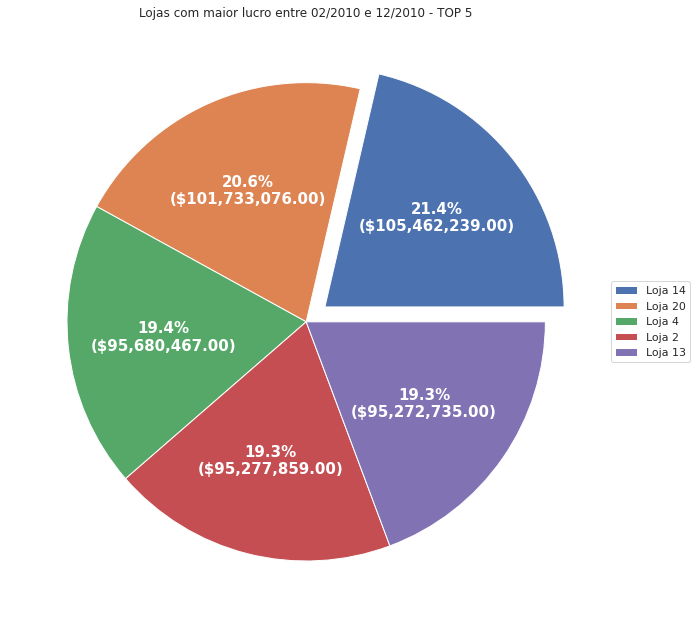

In [ ]:
def set_label(pct, sizes):
    valor = int(pct/100.*np.sum(sizes))
    valor = locale.currency(valor, grouping=True)
    return '%.1f%%\n(%s)'%(pct, valor)

fig, ax = plt.subplots(figsize=(11,11,))
labels=[f"Loja {loja}" for loja in df_vendas_loja_2010_top5['loja_id']]
sizes = df_vendas_loja_2010_top5['venda_anual_milhoes']
explode = (0.1, 0, 0, 0, 0)

fatias, texts, autotexts = ax.pie(sizes, 
        explode=explode,
        autopct=lambda pct: set_label(pct, sizes),
        textprops={'color':'w', 'weight':'bold', 'size':15}
       )
ax.legend(fatias, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Lojas com maior lucro entre 02/2010 e 12/2010 - TOP 5')
plt.show()

#### b) Acúmulo ou Subtração do total 

Mostrar o valor acumulado de uma variável em nossa base de dados é um processo simples. Mas vamos supor que nosso cliente deseje ver de que forma este valor foi construído em uma janela específica de tempo. Uma forma interessante de mostrar isso ao cliente seria através de um gráfico de barras simples, mostrando quanto foi acumulado deste valor a intervalos fixos. Entretanto, exibir como um simples gráfico de barras talvez não seja a forma mais fácil de mostrar ao cliente como o montante evoluiu.

Uma outra forma de se trabalhar essa visualização seria através, novamente de um gráfico de barras - Entretanto, dessa vez nossa exibição levaria em conta o valor acumulado intervalo a intervalo, exibindo especificamente a mudança que ocorreu em cada intervalor.

Considerando esta informação, para nossa base, perguntamos:

* **Como se comportou o lucro acumulado das lojas no ano de 2011, mês a mês?**


In [ ]:
df_walmart_2011 = df_walmart_copy.loc[df_walmart.data.dt.strftime('%Y') == '2011']
df_walmart_2011['mes'] = [data.strftime('%m') for data in df_walmart_2011['data']]
# df_walmart_2011['mes'] = [int(data) for data in df_walmart_2011['mes']]
df_walmart_2011.head()
df_vendas_2011 = df_walmart_2011.groupby(['mes']).agg({'vendas_semanais':np.sum})
df_vendas_2011.rename(columns={'vendas_semanais':'vendas_mensais'}, inplace=True)
df_vendas_2011['vendas_mensais'] = [x/1000000000 for x in df_vendas_2011['vendas_mensais']]
df_vendas_2011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,vendas_mensais
mes,
01,0.163704
02,0.186331
03,0.179356
04,0.226527
05,0.181648
06,0.189773
07,0.229911
08,0.188599
09,0.220848


In [ ]:
df_vendas_2011.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='mes')

In [ ]:
sns.set_style("whitegrid")

em_branco = df_vendas_2011['vendas_mensais'].cumsum().shift(1).fillna(0)

total = df_vendas_2011.sum().vendas_mensais
df_vendas_2011.loc['total'] = total
em_branco.loc['total'] = total

passo = em_branco.reset_index(drop=True).repeat(3).shift(-1)
passo[1::3] = np.nan
em_branco.loc["total"] = 0

df_vendas_2011.index



Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       'total'],
      dtype='object', name='mes')

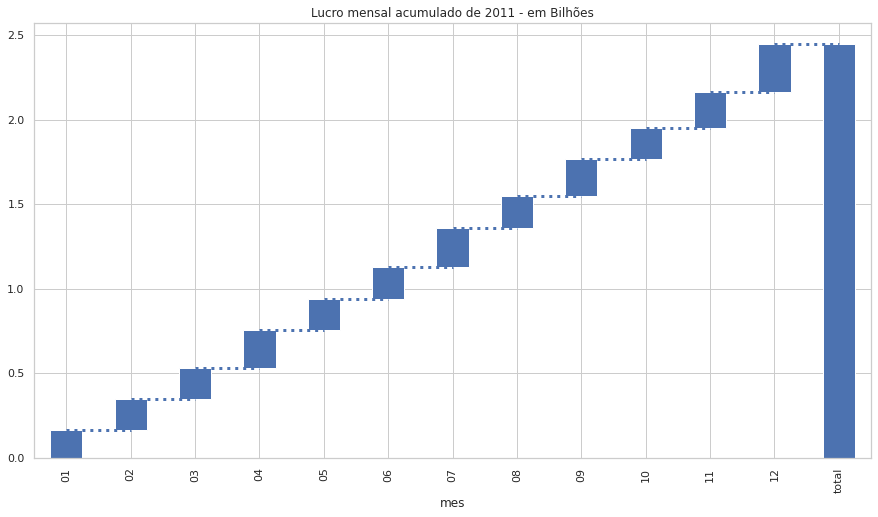

In [ ]:
df_vendas_2011.plot(kind='bar', stacked=True, bottom=em_branco,
                  legend=None, 
                  title="Lucro mensal acumulado de 2011 - em Bilhões", 
                  figsize=(15,8))
plt.plot(passo.index, passo.values, ls=':', linewidth = 3)
plt.show()

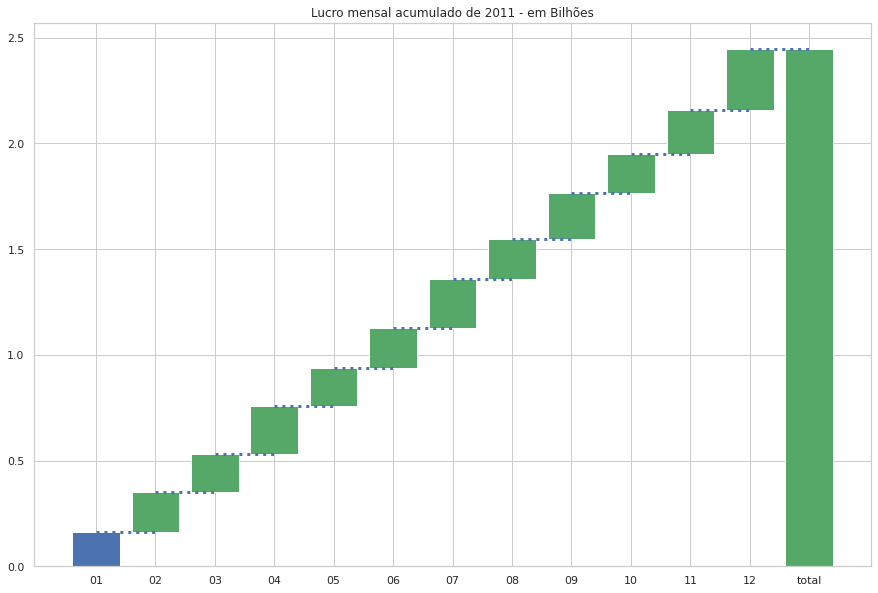

In [ ]:
plt.figure(figsize=(15,10))

cores = ['#4C72B0']+\
    df_vendas_2011.vendas_mensais.\
        apply(lambda vendas_mensais: '#55A868' if vendas_mensais>=0\
               else '#C44E51').tolist()\
    +['#4C72B0']
plt.bar(df_vendas_2011.index, df_vendas_2011.vendas_mensais, bottom=em_branco, color=cores)
plt.plot(passo.index, passo.values, ls=':', linewidth = 3)
plt.title('Lucro mensal acumulado de 2011 - em Bilhões')
plt.show()


#### c) Componentes de componentes

Em uma base de dados em que as informações contidas estão armazenadas em função de um intervalo de tempo, pode ser que tenhamos de mostrar detalhes sobre estas informações em pontos específicos do tempo.

Um exemplo interessante que podemos explorar, em nossa base, é ver como o valor total de vendas divide-se entre todas as lojas. Podemos também, ao saber qual a loja que teve o maior lucro, querer explorar em que período ela teve seu maior valor em vendas. Normalmente, poderiamos gerar gráficos específicos para cada questionamento desse. Entretanto, uma forma que agrega bastante valor para o cliente é exibir um gráfico de componentes de componentes, um gráfico de colunas onde cada coluna é derivada de outra coluna.

Com essa informação e nossa base, perguntamos:

* **Qual loja vendeu mais em 2011, como suas vendas se distribuiram entre os meses e em que semana essa loja acumulou mais vendas?**

In [ ]:
def get_week(day):
  if day <= 7:
    return 1
  elif day <= 14:
    return 2
  elif day <= 21:
    return 3
  else:
    return 4

df_walmart_copy = df_walmart.copy(deep=True)
df_walmart_copy['ano'] = [data.strftime('%Y') for data in df_walmart_copy['data']]
df_walmart_copy['mes'] = [data.strftime('%m') for data in df_walmart_copy['data']]
df_walmart_copy['semana'] = [get_week(data.day) for data in df_walmart_copy['data']]
df_walmart_2011 = df_walmart_copy.loc[df_walmart_copy['ano'] == '2011']
df_walmart_2011 = df_walmart_2011[['loja_id','vendas_semanais','mes','semana']]
df_walmart_2011


,loja_id,vendas_semanais,mes,semana
48,1,1444732.28,01,1
49,1,1391013.96,01,2
50,1,1327405.42,01,3
51,1,1316899.31,01,4
52,1,1606629.58,02,1
...,...,...,...,...
6387,45,875699.81,12,1
6388,45,957155.31,12,2
6389,45,1078905.68,12,3
6390,45,1521957.99,12,4


In [ ]:
df_vendas_2011 = df_walmart_2011.groupby(['loja_id']).agg({'vendas_semanais':np.sum}).reset_index()
df_vendas_2011.rename(columns={'vendas_semanais': 'vendas_anuais'}, inplace=True)
# df_vendas_2011

In [ ]:
df_walmart_2011_top5 = df_vendas_2011.sort_values(by='vendas_anuais', ascending=False)[:5]
df_walmart_2011_top5['pct'] = df_walmart_2011_top5['vendas_anuais'] / df_walmart_2011_top5['vendas_anuais'].sum() * 100
df_walmart_2011_top5

,loja_id,vendas_anuais,pct
3,4,1.110923e+08,20.941845
19,20,1.098370e+08,20.705212
13,14,1.060963e+08,20.000052
12,13,1.045375e+08,19.706213
9,10,9.891689e+07,18.646678


In [ ]:
# 12 meses da melhor loja

loja = df_walmart_2011_top5['loja_id'].values[0]

df_walmart_2011_top5_mes = df_walmart_2011[
    (df_walmart_2011['loja_id']==loja)
].groupby('mes').agg({'vendas_semanais':np.sum}).sort_values(by='vendas_semanais', ascending=False)
df_walmart_2011_top5_mes['pct'] = df_walmart_2011_top5_mes['vendas_semanais'] / df_walmart_2011_top5_mes['vendas_semanais'].sum() * 100
df_walmart_2011_top5_mes

,vendas_semanais,pct
mes,,
12,13144846.51,11.832366
09,10208029.69,9.188783
07,10193027.80,9.175279
04,10034555.89,9.032630
11,9732895.19,8.761089
02,8701523.58,7.832698
10,8600688.22,7.741931
08,8487108.44,7.639691
06,8288884.07,7.461259


In [ ]:
# Melhor loja por semana

loja = df_walmart_2011_top5['loja_id'].values[0]
mes = df_walmart_2011_top5_mes.index.values[0]

df_walmart_2011_top5_semana = df_walmart_2011[
    (df_walmart_2011['mes']==mes) & 
    (df_walmart_2011['loja_id']==loja) ].copy(deep=True)
df_walmart_2011_top5_semana = df_walmart_2011_top5_semana.groupby('semana').agg({'vendas_semanais':np.sum})\
                                        .sort_values(by='vendas_semanais', ascending=False)
df_walmart_2011_top5_semana['pct'] = \
df_walmart_2011_top5_semana['vendas_semanais'] / df_walmart_2011_top5_semana['vendas_semanais'].sum() * 100
df_walmart_2011_top5_semana

,vendas_semanais,pct
semana,,
4,5683494.84,43.237438
3,2771397.17,21.083526
2,2508955.24,19.086988
1,2180999.26,16.592048


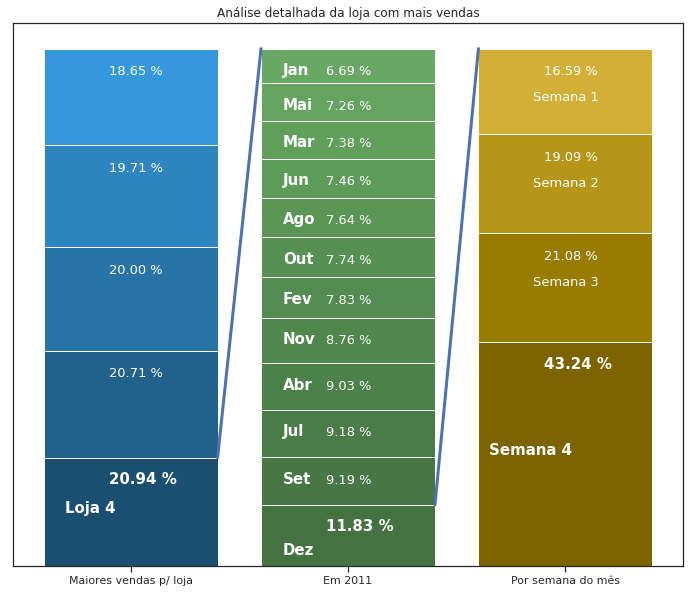

In [ ]:
mes = {'01':'Jan',
       '02':'Fev',
       '03':'Mar',
       '04':'Abr',
       '05':'Mai',
       '06':'Jun',
       '07':'Jul',
       '08':'Ago',
       '09':'Set',
       '10':'Out',
       '11':'Nov',
       '12':'Dez'}
       
sns.set_style("ticks")
loja = df_walmart_2011_top5['loja_id'].values[0]

fontdict={'size':13,'color':'w'} 
fontdict_bold={'size':15,'color':'w', 'weight':'bold'} 

cores1 = ['#1B4F72', '#21618C', '#2874A6', '#2E86C1', '#3498DB' ]
cores2 = ['#447241', '#477744', '#4a7c47', '#4d814a', '#50874d', '#538c50', '#569153',\
          '#599656', '#5d9b59', '#60a05b', '#64a460', '#69a765']
cores3 = ['#7d6200', '#997b00', '#b69517', '#d4af37']

altura = 0
fig, ax = plt.subplots(figsize=(12,10))

for i, percentual in enumerate(df_walmart_2011_top5['pct']):
    ax.bar([0], percentual, bottom=altura, color=[cores1[i]])
    if i==0:
        ax.text(-.1, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(-.3, percentual/2, f'Loja {loja}', fontdict=fontdict_bold)
    else:
        ax.text(-.1, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
    altura += percentual

altura=0
for i, percentual in enumerate(df_walmart_2011_top5_mes['pct']):
    ax.bar([1], percentual, bottom=altura, color=[cores2[i]])
    if i==0:
        ax.text(.9, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(.7, percentual/5, mes[f'{df_walmart_2011_top5_mes.index[i]}'], fontdict=fontdict_bold)
    else:
        ax.text(.9, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(.7, percentual+altura-5, mes[f'{df_walmart_2011_top5_mes.index[i]}'], fontdict=fontdict_bold)
    altura += percentual

altura=0
for i, percentual in enumerate(df_walmart_2011_top5_semana['pct']):
    ax.bar([2], percentual, bottom=altura, color=[cores3[i]])
    if i==0:
        ax.text(1.9, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(1.65, percentual/2, f'Semana {df_walmart_2011_top5_semana.index[i]}', fontdict=fontdict_bold)
    else:
        ax.text(1.9, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(1.85, percentual+altura-10, f'Semana {df_walmart_2011_top5_semana.index[i]}', fontdict=fontdict)
    altura += percentual    

plt.plot([0.4, .6, np.nan, 1.4, 1.6],
         [df_walmart_2011_top5['pct'].values[0], 100, np.nan, df_walmart_2011_top5_mes['pct'].values[0], 100], 
         linewidth=3)
    
plt.xticks(range(3), labels=['Maiores vendas p/ loja', 'Em 2011', 'Por semana do mês'])
plt.yticks([])
plt.title('Análise detalhada da loja com mais vendas')
plt.show()

## 5.3 Relacionamento

Quando desejamos visualizar de que forma um certo conjunto de variáveis se relacionam em uma base de dados, utilizamos os gráficos que apresentam o relacionamento entre variáveis. Frequentemente, ao se analisar uma relação, procura-se normalizar os dados, a fim de deixá-los em uma mesma escala e evitar ruídos e discrepâncias.

In [ ]:
print(df_walmart.dtypes)

loja_id                       int64
data                 datetime64[ns]
vendas_semanais             float64
feriado_id                    int64
temperatura                 float64
preco_combustivel           float64
ipc                         float64
desemprego                  float64
dtype: object


In [ ]:
df_numericos = ['vendas_semanais', 'temperatura', 'preco_combustivel', 'ipc', 'desemprego']

In [ ]:
df_t = df_walmart.copy(deep=True)
df_t['mes_ano'] = df_t.data.dt.strftime('%m-%Y')
df_t = df_t.groupby(['mes_ano']).agg({'vendas_semanais':np.mean, 'temperatura': np.mean, 'preco_combustivel': np.mean, 'ipc': np.mean ,'desemprego': np.mean}).sort_index().reset_index()
df_t

,mes_ano,vendas_semanais,temperatura,preco_combustivel,ipc,desemprego
0,01-2011,9.094665e+05,34.387222,3.113956,168.791818,8.291200
1,01-2012,9.383026e+05,40.822833,3.368350,174.267656,7.508333
2,02-2010,1.057405e+06,36.288000,2.691967,167.834459,8.619311
3,02-2011,1.035174e+06,37.919778,3.173000,169.590035,8.291200
4,02-2012,1.067020e+06,42.494944,3.533872,174.618349,7.508333
5,03-2010,1.010666e+06,47.194389,2.786706,167.930846,8.619311
6,03-2011,9.964247e+05,49.115000,3.521983,170.323888,8.291200
7,03-2012,1.028932e+06,52.489644,3.815524,175.141545,7.508333
8,04-2010,1.028499e+06,56.901378,2.868538,167.678437,8.497711
9,04-2011,1.006784e+06,56.532444,3.769960,171.000805,8.150133


In [ ]:
df_valores_numericos = df_t[df_numericos]
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_valores_numericos), columns=df_numericos)
df_norm

,vendas_semanais,temperatura,preco_combustivel,ipc,desemprego
0,0.000000,0.000000,0.329016,0.128224,0.803007
1,0.077120,0.139826,0.527362,0.738743,0.332986
2,0.395650,0.041298,0.000000,0.021485,1.000000
3,0.336194,0.076752,0.375052,0.217220,0.803007
4,0.421363,0.176156,0.656417,0.777842,0.332986
5,0.270648,0.278261,0.073866,0.032231,1.000000
6,0.232562,0.319990,0.647147,0.299039,0.803007
7,0.319500,0.393311,0.876015,0.836175,0.332986
8,0.318343,0.489164,0.137669,0.004089,0.926993
9,0.260269,0.481148,0.840490,0.374511,0.718313


### 5.3.1 Relacionamento com Duas Variáveis

Quando desejamos visualizar a relação entre duas variáveis podemos utilizar o **Gráfico de Dispersão**. Ele apresenta duas dimensões, e cada pontinho representa o valor entre essas dimensões. Nosso cliente, por exemplo, pode ingadar:
* **Há alguma relação entre o preço do combustível e as vendas?**

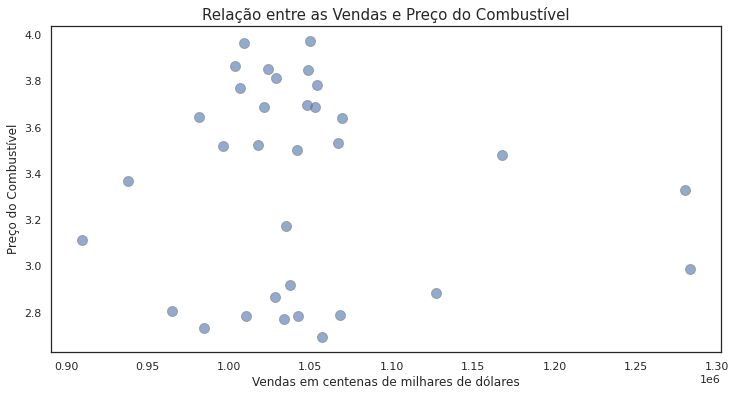

In [ ]:
sns.set_style("white")

x = df_valores_numericos.vendas_semanais
y = df_valores_numericos.preco_combustivel
plt.figure(figsize=(12, 6))
plt.scatter(x, y, sizes=[100], cmap="viridis", alpha=.6, edgecolors='grey', linewidth=1)
plt.title('Relação entre as Vendas e Preço do Combustível', fontdict={'size':15})
plt.xlabel('Vendas em centenas de milhares de dólares')
plt.ylabel('Preço do Combustível')
plt.show()

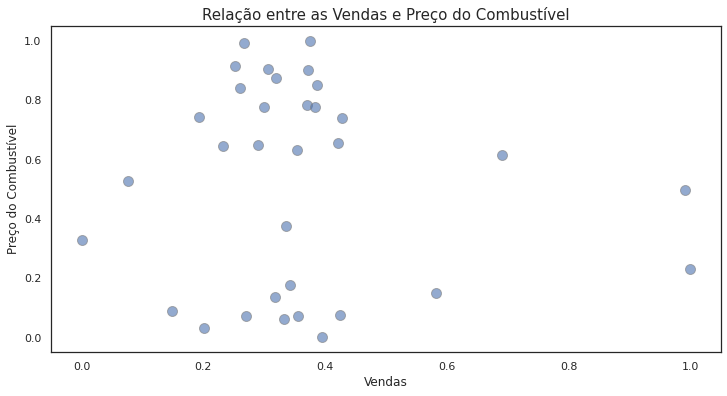

In [ ]:
sns.set_style("white")

x = df_norm.vendas_semanais
y = df_norm.preco_combustivel
plt.figure(figsize=(12, 6))
plt.scatter(x, y, sizes=[100], cmap="viridis", alpha=.6, edgecolors='grey', linewidth=1)
plt.title('Relação entre as Vendas e Preço do Combustível', fontdict={'size':15})
plt.xlabel('Vendas')
plt.ylabel('Preço do Combustível')
plt.show()

* **E entre o IPC e o preço do combustível?**

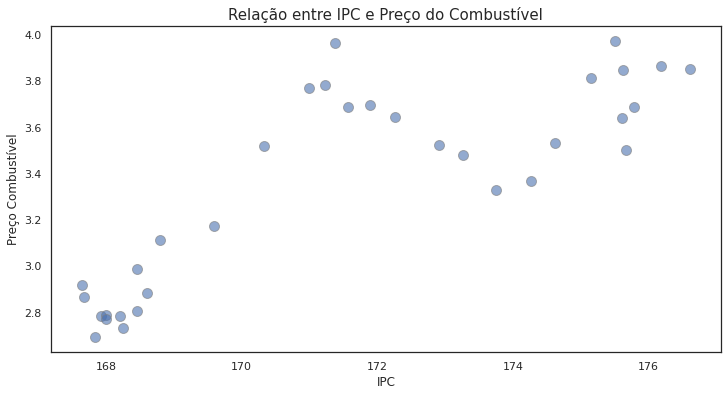

In [ ]:
sns.set_style("white")

x = df_valores_numericos.ipc
y = df_valores_numericos.preco_combustivel
plt.figure(figsize=(12, 6))
plt.scatter(x, y, sizes=[100], cmap="viridis", alpha=.6, edgecolors='grey', linewidth=1)
plt.title('Relação entre IPC e Preço do Combustível', fontdict={'size':15})
plt.xlabel('IPC')
plt.ylabel('Preço Combustível')
plt.show()

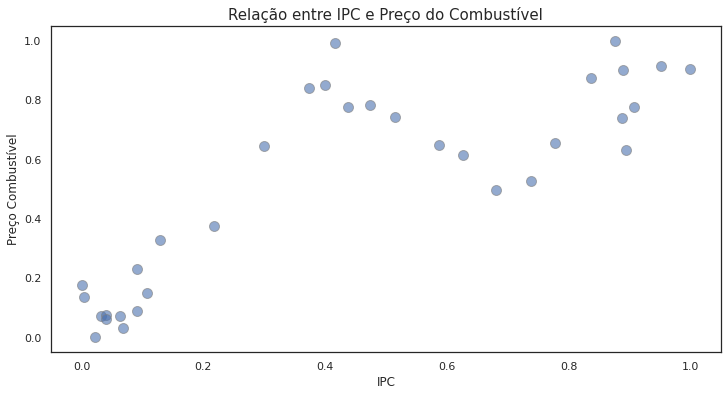

In [ ]:
sns.set_style("white")

x = df_norm.ipc
y = df_norm.preco_combustivel
plt.figure(figsize=(12, 6))
plt.scatter(x, y, sizes=[100], cmap="viridis", alpha=.6, edgecolors='grey', linewidth=1)
plt.title('Relação entre IPC e Preço do Combustível', fontdict={'size':15})
plt.xlabel('IPC')
plt.ylabel('Preço Combustível')
plt.show()

### 5.3.2 Relacionamento com Três Variáveis 

Quando desejamos visualizar a relação entre três variáveis podemos utilizar o **Gráfico de Bolhas**. Ele apresenta duas dimensões, e o pontinho representa o valor entre essas dimensões e o tamanho desse pontinho reflete a terceira dimensão (variável, para ficar mais didático). Nosso cliente, por exemplo, pode ingadar:
* **Há alguma relação entre o preço do combustível, as vendas e a temperatura?**

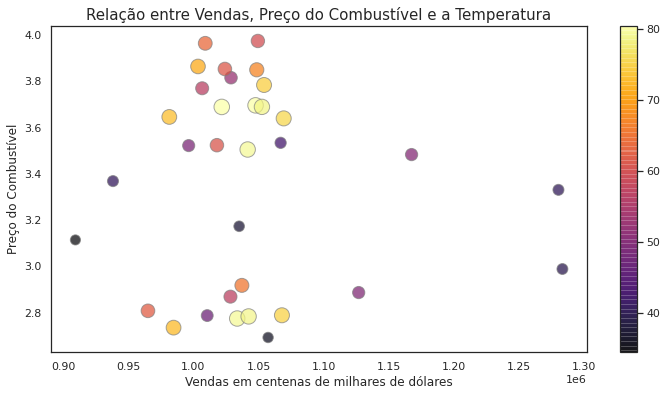

In [ ]:
sns.set_style("white")

x = df_valores_numericos.vendas_semanais
y = df_valores_numericos.preco_combustivel
z = df_valores_numericos.temperatura
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c=z, sizes=z*3, cmap="inferno", alpha=.7, edgecolors='grey', linewidth=1)
plt.title('Relação entre Vendas, Preço do Combustível e a Temperatura', fontdict={'size':15})
plt.xlabel('Vendas em centenas de milhares de dólares')
plt.ylabel('Preço do Combustível')
plt.colorbar()
plt.show()

* **E entre o IPC, o preço do combustível e a temperatura?**

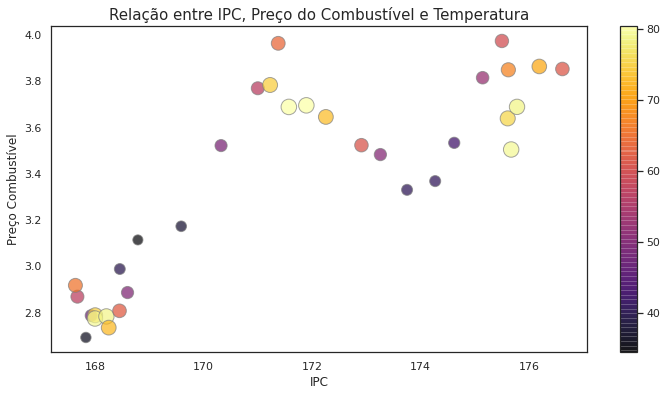

In [ ]:
sns.set_style("white")

x = df_valores_numericos.ipc
y = df_valores_numericos.preco_combustivel
z = df_valores_numericos.temperatura
plt.figure(figsize=(12, 6))
plt.scatter(x, y, c=z, sizes=z*3, cmap="inferno", alpha=.7, edgecolors='grey', linewidth=1)
plt.title('Relação entre IPC, Preço do Combustível e Temperatura', fontdict={'size':15})
plt.xlabel('IPC')
plt.ylabel('Preço Combustível')
plt.colorbar()
plt.show()

##### Bônus

Para visualizar as relações entre as variáveis existentes no dataset, podemos utilizar o **Mapa de Calor**.

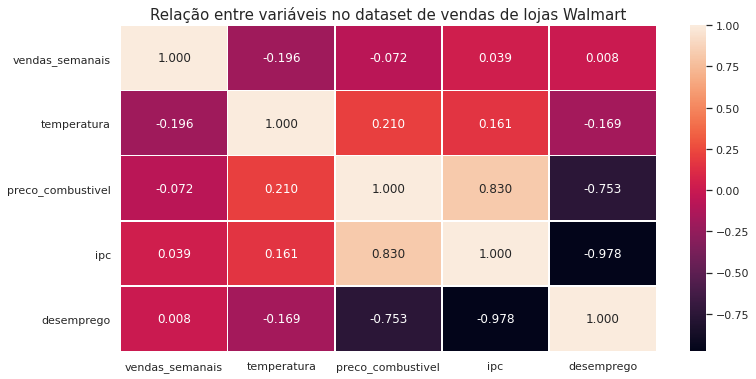

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_norm.corr(), annot=True, ax=ax, linewidths=.5, fmt='.3f') 
plt.title('Relação entre variáveis no dataset de vendas de lojas Walmart', fontdict={'size':15})
plt.show()

## 5.4 Distribuição

### 5.3.1 Variável Única

#### a) Poucos dados

In [ ]:
df_walmart_distcopy = df_walmart.copy(deep=True)
df_walmart_distcopy['mes_ano'] = [data.strftime('%Y-%m') for data in df_walmart_distcopy['data']]
df_walmart_distcopy

,loja_id,data,vendas_semanais,feriado_id,temperatura,preco_combustivel,ipc,desemprego,mes_ano
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012-09
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012-10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012-10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012-10


In [ ]:
df_walmart_distcopy_mean = df_walmart_distcopy.groupby(['mes_ano']).agg({'temperatura':np.mean}).reset_index()
df_walmart_distcopy_mean.head()

,mes_ano,temperatura
0,2010-02,36.288000
1,2010-03,47.194389
2,2010-04,56.901378
3,2010-05,65.364389
4,2010-06,75.076556


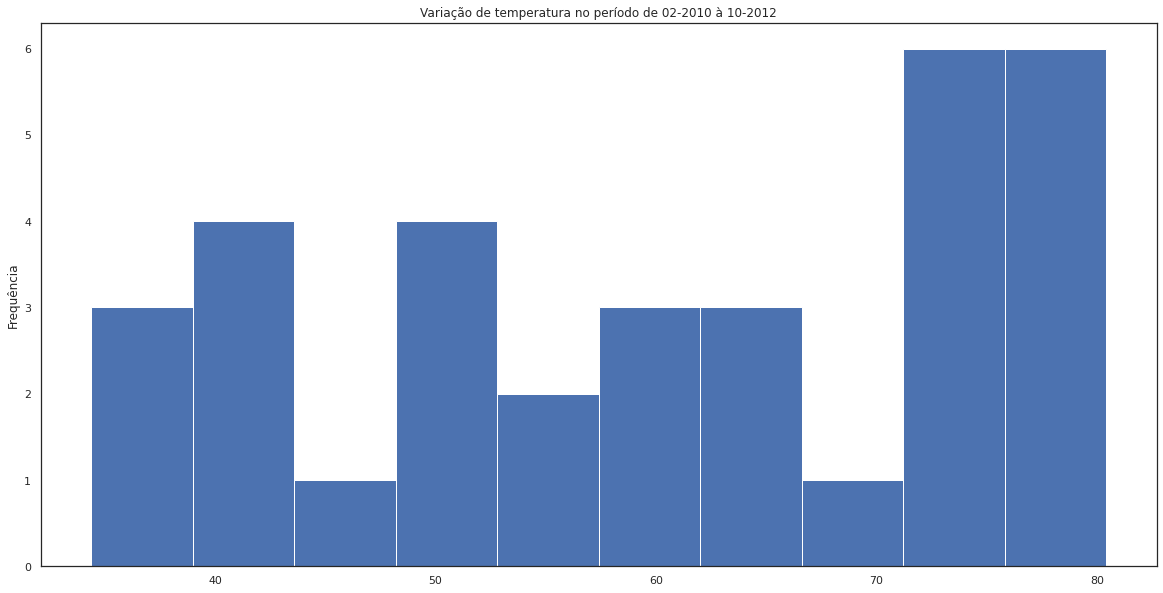

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df_walmart_distcopy_mean['temperatura'])
plt.title('Variação de temperatura no período de 02-2010 à 10-2012')
plt.ylabel('Frequência')
plt.show()

#### b) Muitos dados

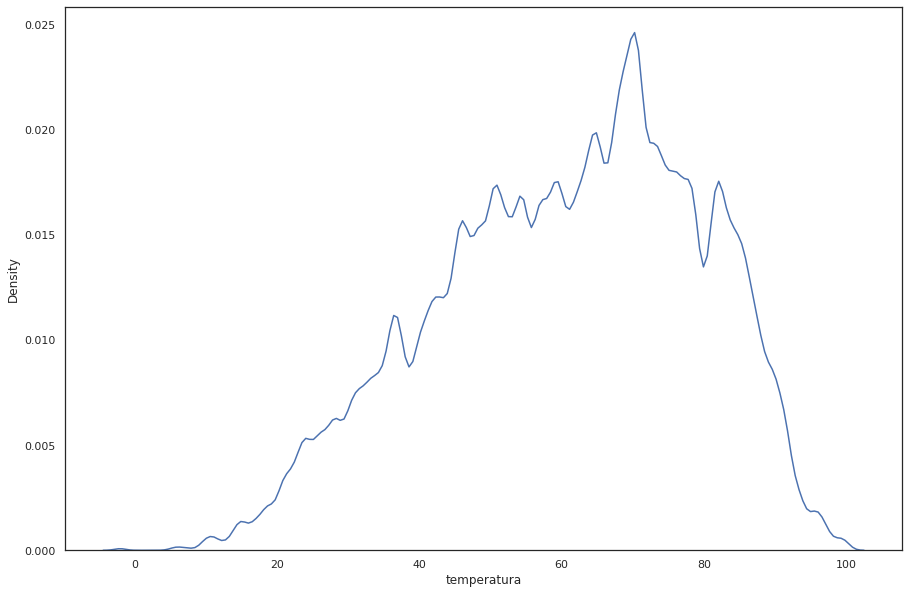

In [ ]:
figs, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data= df_walmart_distcopy['temperatura'], bw_adjust=.25, ax=ax)

### 5.3.2 Duas Variáveis

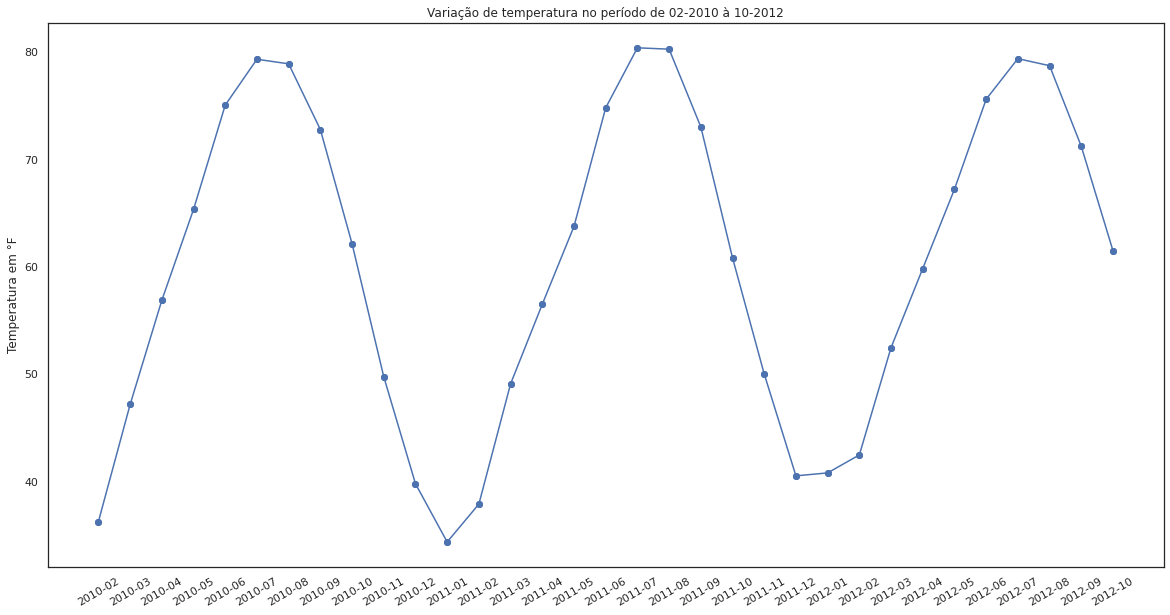

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df_walmart_distcopy_mean['mes_ano'], df_walmart_distcopy_mean['temperatura'])
plt.plot(df_walmart_distcopy_mean['mes_ano'], df_walmart_distcopy_mean['temperatura'], '-o')
plt.xticks(rotation=30)
plt.title('Variação de temperatura no período de 02-2010 à 10-2012')
plt.ylabel('Temperatura em °F')
plt.show()

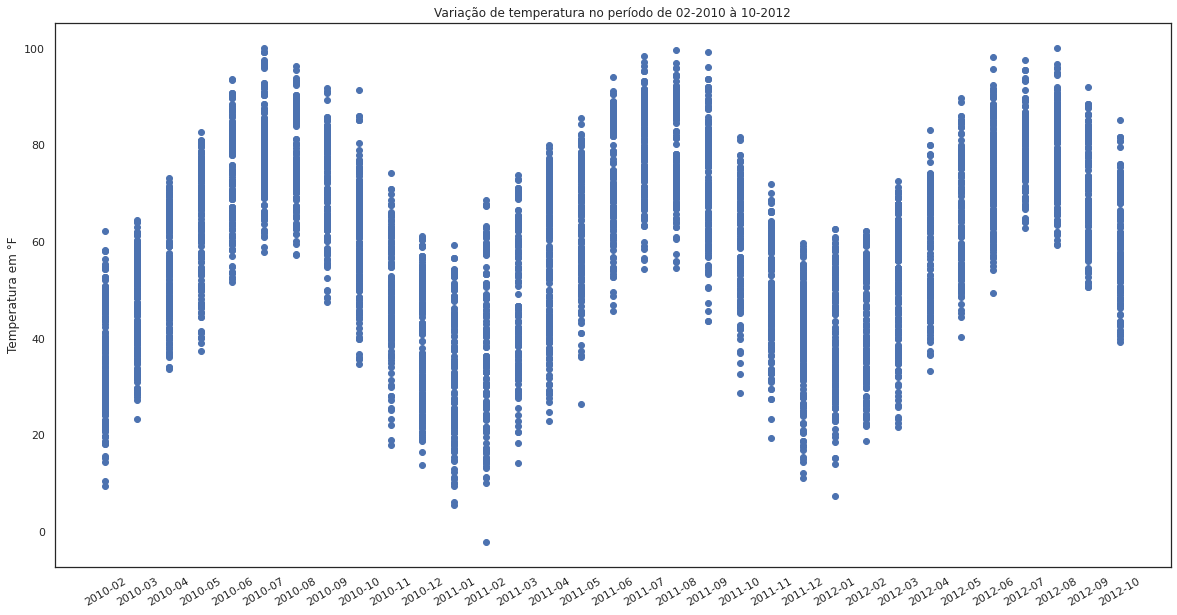

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df_walmart_distcopy['mes_ano'], df_walmart_distcopy['temperatura'])
plt.xticks(rotation=30)
plt.title('Variação de temperatura no período de 02-2010 à 10-2012')
plt.ylabel('Temperatura em °F')
plt.show()